# [Module 2.1] SKLearn XGBoost 훈련 및 추론

이 노트북은 아래와 같은 작업을 합니다.
- 훈련, 검증 데이터 로딩
- 훈련, 검증 데이터의 X, y 로 분리
- XGBoost 로 훈련
- 테스트 데이터 로딩 및 추론
- 모델 평가
- 피쳐 Importance 추출

In [43]:
import pandas as pd

In [44]:
%store -r pre_train_file
%store -r pre_val_file
%store -r pre_test_file

## 훈련, 검증 데이터 로딩

In [45]:
train_df = pd.read_csv(pre_train_file, header=None, skiprows=1)
val_df = pd.read_csv(pre_val_file, header=None, skiprows=1)

In [46]:
from IPython.display import display
display(train_df.head())
display(val_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,2649,25,232,29.99,10.96,9000.0,2640.0,1,4,10,5.074929,313.325175,80621.001131,704.106277,289.234266,5.980614,35917.001966,5.074929
1,2,764,12,9194,23.90,26.82,1500.0,14625.0,1,4,10,4.074929,7805.012365,80621.001131,204.396123,40.117269,4.074929,614.204570,4.074929
2,4,295,10,3775,249.90,17.59,610.0,4928.0,1,4,10,30.244957,3742.023214,4961.018757,952.093106,909.097046,43.210375,794.132442,6.074929
3,4,2410,18,2562,89.90,17.51,1850.0,10764.0,1,4,10,6.074929,4962.018970,80621.001131,27766.003039,48.037464,110.726225,10004.011425,6.074929
4,2,2174,18,2141,93.90,17.61,1200.0,12500.0,1,4,10,4.074929,7805.012365,9777.011006,31.405597,31.405597,4.074929,1050.110874,4.074929


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,1372,23,10728,105.00,23.89,1000.0,7632.0,1,19,6,260.375634,6506.014877,4961.018757,2484.036771,365.281119,17.815563,175.544669,4.34846
1,0,784,25,11737,99.97,15.80,650.0,9600.0,1,19,6,7.728837,6718.013196,10105.010047,391.201729,116.495153,5.074929,3818.025616,4.34846
2,3,2660,18,2837,76.99,23.34,1850.0,3000.0,1,19,6,7.728837,262.279317,80621.001131,27766.003039,67.764447,32.281574,10004.011425,4.34846
3,2,2174,18,2060,64.90,15.55,200.0,4752.0,1,19,6,7.728837,4962.018970,80621.001131,27766.003039,113.580980,1866.058804,10004.011425,4.34846
4,4,2820,7,3350,75.00,27.51,2550.0,31500.0,1,19,6,28.361672,7805.012365,80621.001131,27766.003039,929.098360,139.613711,1772.067347,4.34846


## 훈련, 검증의 X, y 값의 분리

In [47]:
X_train, y_train = train_df.iloc[:,1:], train_df.iloc[:,0]
X_val, y_val = val_df.iloc[:,1:], val_df.iloc[:,0]

## XGBoost 훈련

### XGBoost Parameters
- https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [48]:
import xgboost as xgb

xgb_et = xgb.XGBClassifier(objective='multi:softmax',
                          colsample_bytree = 0.3,
                           max_depth = 10, alpha = 10, 
                           n_estimators = 200)
xgb_et.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
xgb_et.score(X_val, y_val)

0.33484668055969036

## 테스트 데이터 로딩 및 추론

In [50]:
test_df = pd.read_csv(pre_test_file, header=None,skiprows=1)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3,1372,23,10728,105.00,23.89,1000.0,7632.0,1,19,6,260.375634,6506.014877,4961.018757,2484.036771,365.281119,17.815563,175.544669,4.34846
1,0,784,25,11737,99.97,15.80,650.0,9600.0,1,19,6,7.728837,6718.013196,10105.010047,391.201729,116.495153,5.074929,3818.025616,4.34846
2,3,2660,18,2837,76.99,23.34,1850.0,3000.0,1,19,6,7.728837,262.279317,80621.001131,27766.003039,67.764447,32.281574,10004.011425,4.34846
3,2,2174,18,2060,64.90,15.55,200.0,4752.0,1,19,6,7.728837,4962.018970,80621.001131,27766.003039,113.580980,1866.058804,10004.011425,4.34846
4,4,2820,7,3350,75.00,27.51,2550.0,31500.0,1,19,6,28.361672,7805.012365,80621.001131,27766.003039,929.098360,139.613711,1772.067347,4.34846


In [51]:
X_test, y_test = test_df.iloc[:,1:], test_df.iloc[:,0]

In [52]:
prediction = xgb_et.predict(X_test)

## 모델 평가

In [53]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, prediction)
f1_score = f1_score(y_test, prediction, average='macro')
print("accuracy: %.2f%%" % accuracy)
print("f1_score: %.2f%%" % f1_score)

accuracy: 0.33%
f1_score: 0.12%


[[  36   28 1628    8    5]
 [  22   57 4011   38   34]
 [   9   28 4368   84   46]
 [   0    5 2113   31   19]
 [   1    2  850    6    7]]


<Figure size 432x288 with 0 Axes>

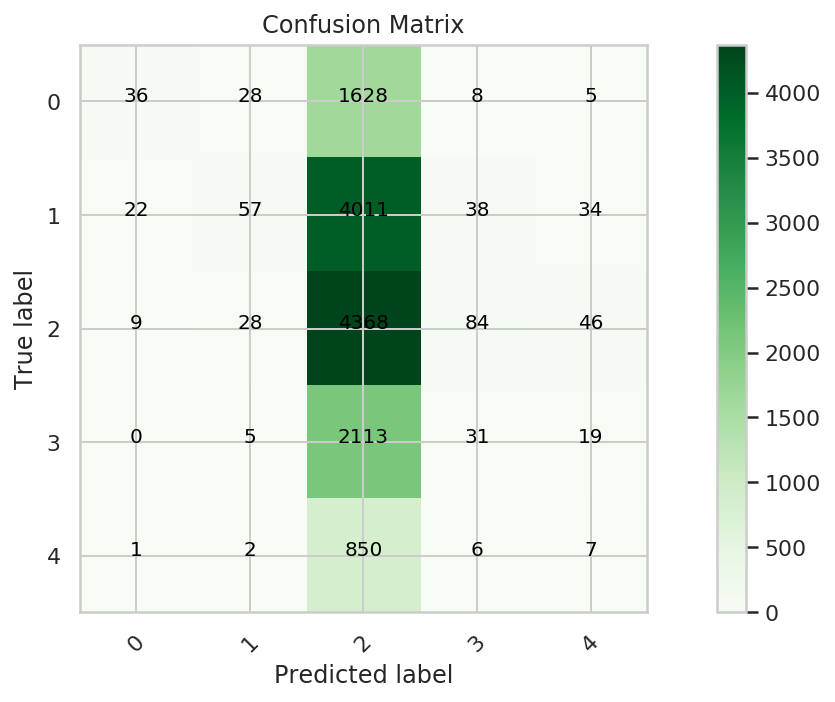

In [54]:
from utils import plot_conf_mat


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

cm = confusion_matrix(y_true= y_test, y_pred= prediction)

plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
plot_conf_mat(cm, 
              classes=['0','1', '2', '3', '4'], 
              title='Confusion Matrix')
plt.show()

## Feature Importance

In [55]:
test_col_df = pd.read_csv(pre_test_file)
features = test_col_df.columns[1:]
features


Index(['lb_customer_city', 'lb_customer_state', 'lb_customer_zip_code_prefix',
       'price', 'freight_value', 'product_weight_g', 'product_volume',
       'order_weekday', 'order_day', 'order_month',
       'te_product_id_mean_smoothed',
       'te_product_category_name_english_mean_smoothed',
       'te_seller_state_mean_smoothed', 'te_seller_city_mean_smoothed',
       'te_seller_zip_code_prefix_mean_smoothed',
       'te_customer_seller_city_mean_smoothed',
       'te_customer_seller_state_mean_smoothed',
       'te_customer_seller_zip_code_prefix_mean_smoothed'],
      dtype='object')

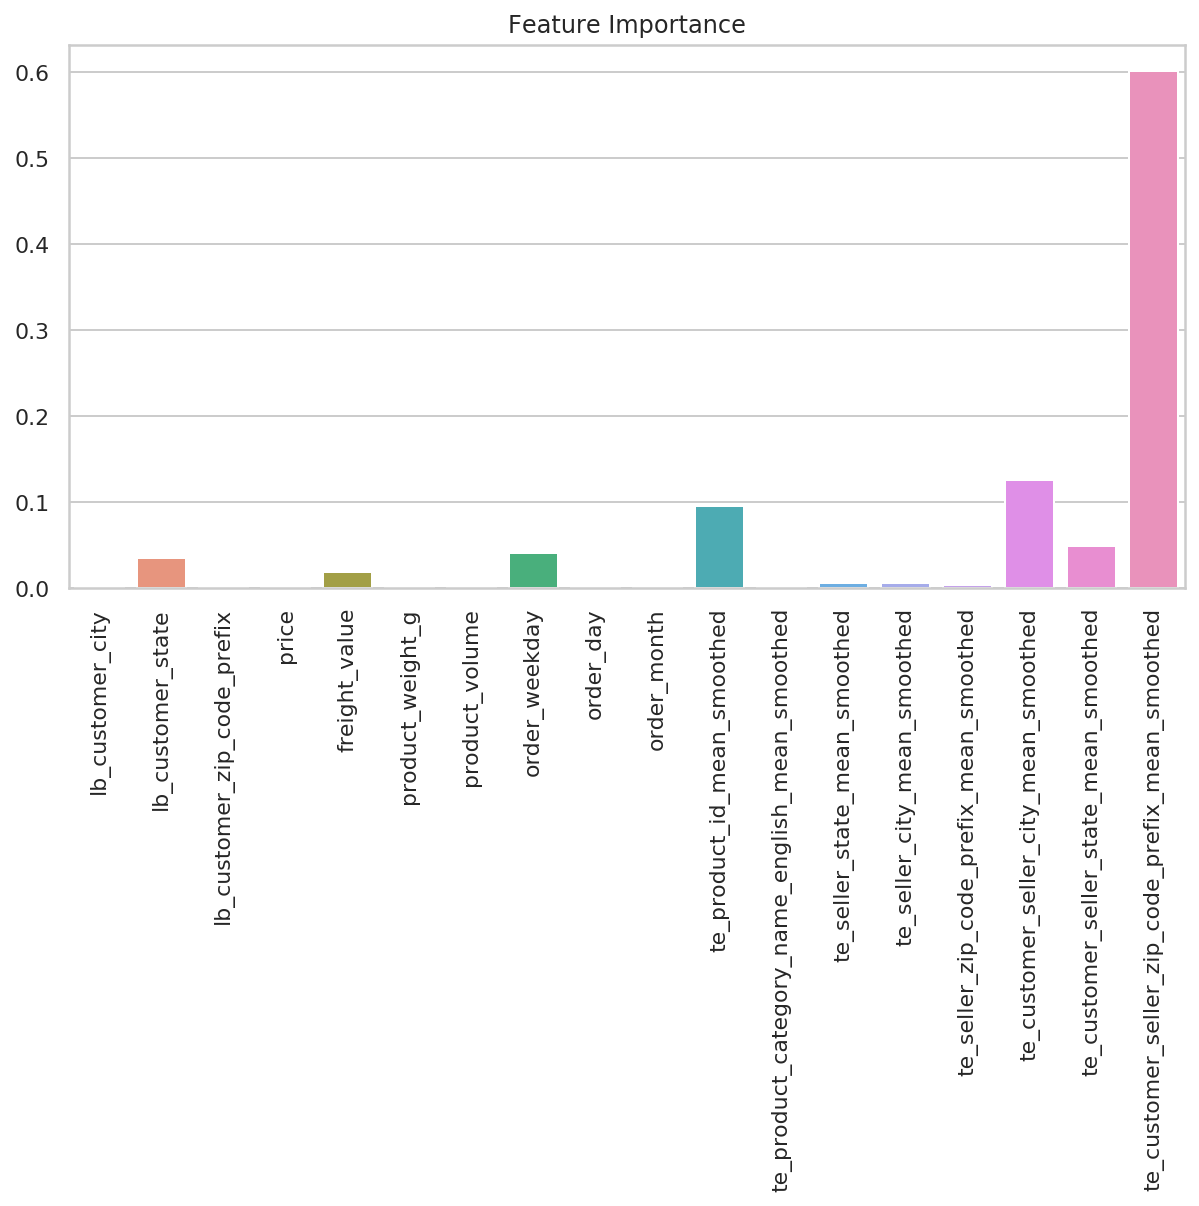

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


test_col_df = pd.read_csv(pre_test_file)
features = test_col_df.columns[1:]
fea_importance = xgb_et.feature_importances_

f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=features, y= fea_importance)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()